In [1]:
#Importamos módulos

import numpy as np
import matplotlib.pyplot as plt 
import numpy as np
import pydicom
import matplotlib
from skimage import measure, viewer


/usr/local/lib/python3.8/dist-packages/skimage/viewer/utils/__init__.py:1: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  from .core import *


In [2]:
#Importamos la imagen e introducimos la semilla
matplotlib.use('TkAgg') 
ds = pydicom.dcmread('D0120.dcm',force=True)
img = ds.pixel_array
img = img/img.max()
plt.ion()
plt.title("Seleccione puntos con tecla izquierda, \n borre el último punto con tecla derecha,\n finalize con tecla central", fontsize=16)
plt.imshow(img, cmap = 'gray')
plt.pause(0.001)
seed_coord = plt.ginput(-1)
plt.close()

TclError: couldn't connect to display ":0"

In [89]:
def RegionGrowingP2(image, umbr_inf,umbr_max, seed_coord):
    binarized_image = np.zeros(np.shape(img)+ ((len(seed_coord),)))
    labeled_image = binarized_image
    i = 0
    for y,x in seed_coord:
        x = round(x)
        y = round(y)
        intensity = image[x,y]
        binarized_image[:,:,i] = np.logical_and(image > intensity-umbr_inf, image < intensity+umbr_max)*1
        labeled_image[:,:,i] = measure.label(binarized_image[:,:,i], background=False, connectivity=2)
        label = labeled_image[:,:,i][x,y]
        labeled_image[:,:,i] = (labeled_image[:,:,i]==label)*1
        i += 1
    final_image = np.sum(labeled_image, axis = 2)
    final_image = (final_image != 0)*img
    return final_image

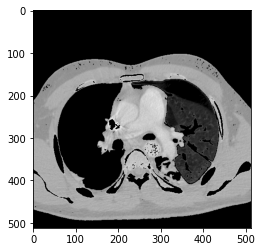

In [90]:
%matplotlib inline
extracted_image = RegionGrowingP2(img,0.1,0.1,seed_coord)
plt.imshow(extracted_image, cmap = "gray")